In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [33]:
sns.set(style="whitegrid")

q1_df = pd.read_excel('cluster_results_cleaned.xlsx')

**Drinks**

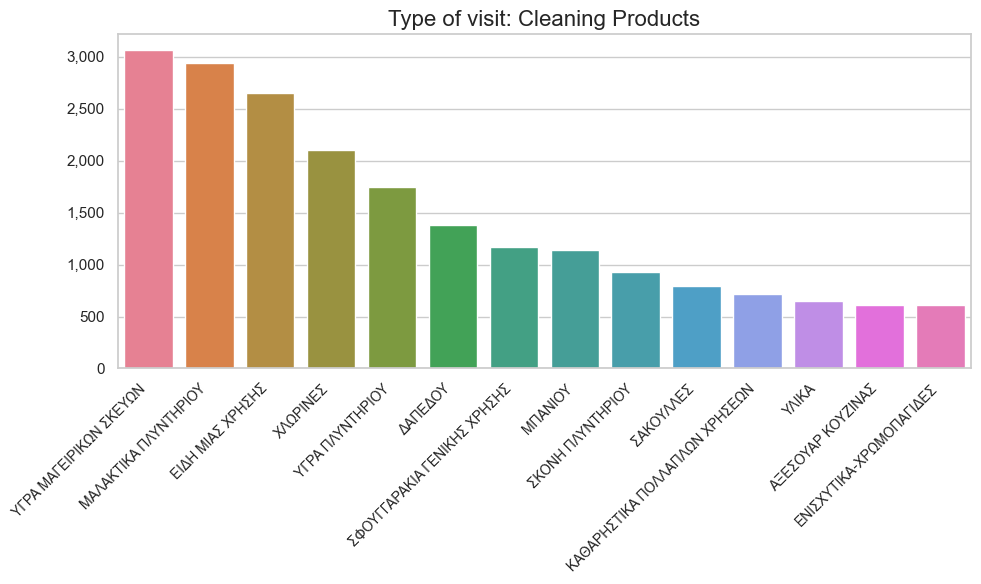

In [34]:
# Drinks
cluster_data = q1_df[q1_df['cluster'] == 'cluster_0']

# Create a bar plot for each cluster
plt.figure(figsize=(10, 6))
sns.barplot(
    x="product_name", 
    y="count(Joint code)", 
    data=cluster_data, 
    hue="product_name",  # Use x variable as hue
    dodge=False,         # Prevent splitting bars
    legend=False         # Suppress legend
)

# Add labels and title
plt.title(f"Type of visit: Cleaning Products", fontsize=16)
plt.xlabel("", fontsize=12)
plt.ylabel("", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)

# Format the y-axis ticks with commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}"))

# Show the plot
plt.tight_layout()
plt.show()

**Breakfast**

,cluster,count(Joint code),product_name
0,cluster_1,32808,ΤΥΡΟΚΟΜΙΚΑ_ΧΥΜΑ
1,cluster_1,20582,ΓΑΛΑΤΑ
2,cluster_1,12850,ΓΙΑΟΥΡΤΙΑ
3,cluster_1,11324,ΑΛΛΑΝΤΙΚΑ_ΧΥΜΑ
4,cluster_1,7064,ΤΥΡΟΚΟΜΙΚΑ_ΣΥΣΚ
5,cluster_1,5450,ΒΟΥΤΥΡΑ
6,cluster_1,5005,ΑΛΛΑΝΤΙΚΑ_ΣΥΣΚ
7,cluster_1,4772,ΥΓΕΙΑΣ
8,cluster_1,4487,ΚΡΕΑΣ
9,cluster_1,3826,ΑΥΓΑ


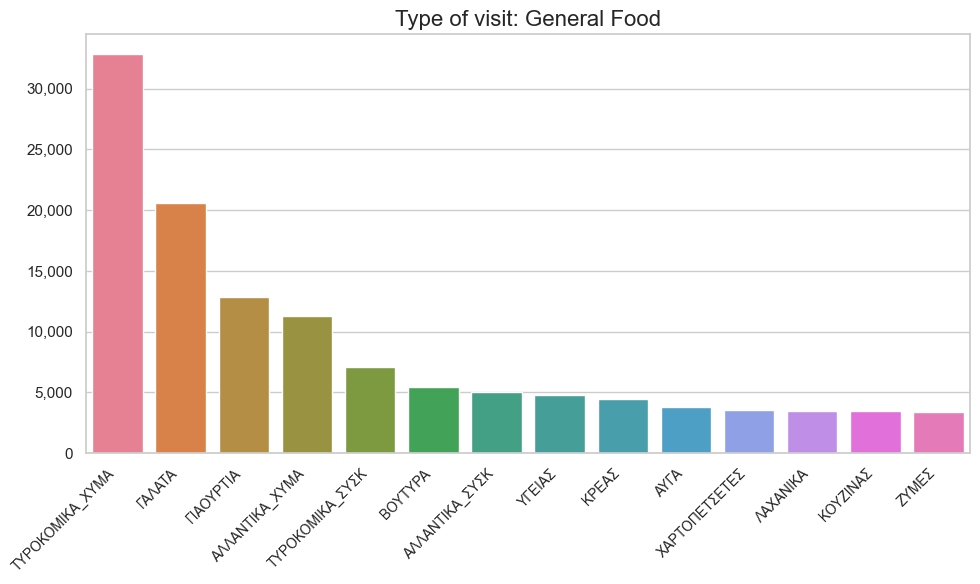

In [35]:
# Breakfast
cluster_data = q1_df[q1_df['cluster'] == 'cluster_1']
display(cluster_data)

# Create a bar plot for each cluster
plt.figure(figsize=(10, 6))
sns.barplot(
    x="product_name", 
    y="count(Joint code)", 
    data=cluster_data, 
    hue="product_name",  # Use x variable as hue
    dodge=False,         # Prevent splitting bars
    errorbar=None,
    legend=False         # Suppress legend
)

# Add labels and title
plt.title(f"Type of visit: General Food", fontsize=16)
plt.xlabel("", fontsize=12)
plt.ylabel("", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)

# Format the y-axis ticks with commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}"))

# Show the plot
plt.tight_layout()
plt.show()

**Cleaning products**

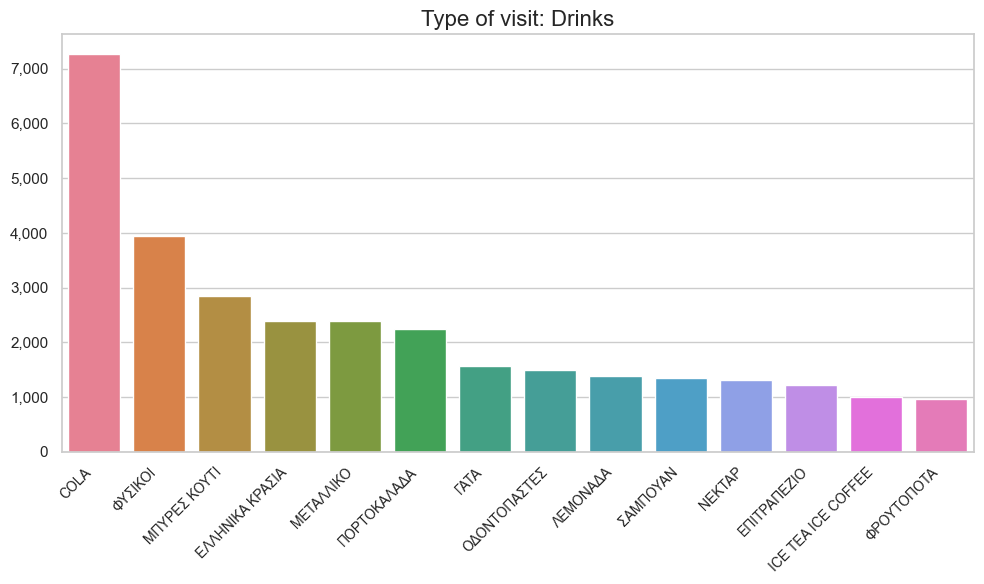

In [36]:
cluster_data = q1_df[q1_df['cluster'] == 'cluster_3']

# Create a bar plot for each cluster
plt.figure(figsize=(10, 6))
sns.barplot(
    x="product_name", 
    y="count(Joint code)", 
    data=cluster_data, 
    hue="product_name",  # Use x variable as hue
    dodge=False,         # Prevent splitting bars
    legend=False         # Suppress legend
)

# Add labels and title
plt.title(f"Type of visit: Drinks", fontsize=16)
plt.xlabel("", fontsize=12)
plt.ylabel("", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)

# Format the y-axis ticks with commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}"))

# Show the plot
plt.tight_layout()
plt.show()

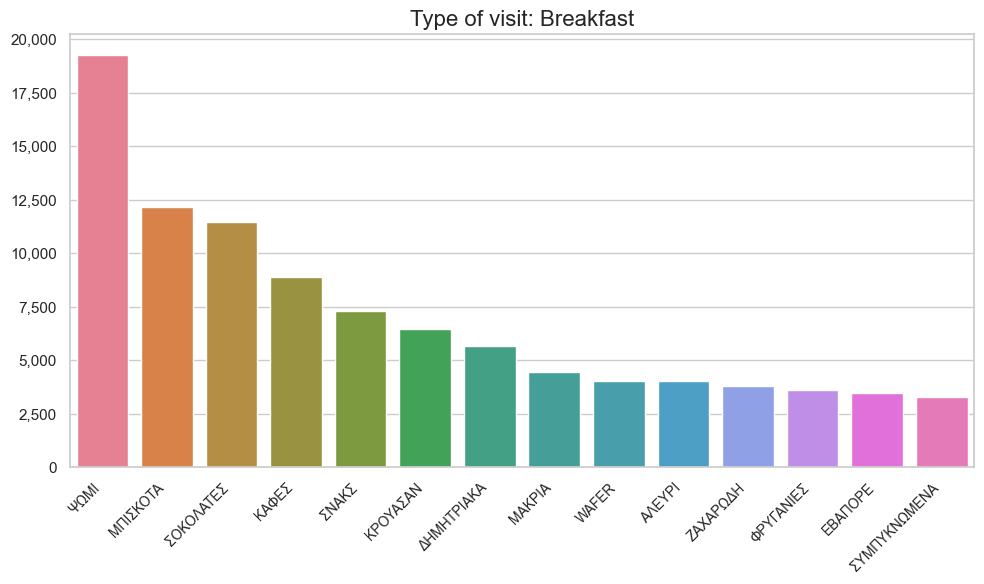

In [37]:
cluster_data = q1_df[q1_df['cluster'] == 'cluster_2']

# Create a bar plot for each cluster
plt.figure(figsize=(10, 6))
sns.barplot(
    x="product_name", 
    y="count(Joint code)", 
    data=cluster_data, 
    hue="product_name",  # Use x variable as hue
    dodge=False,         # Prevent splitting bars
    legend=False         # Suppress legend
)

# Add labels and title
plt.title(f"Type of visit: Breakfast", fontsize=16)
plt.xlabel("", fontsize=12)
plt.ylabel("", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)

# Format the y-axis ticks with commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}"))

# Show the plot
plt.tight_layout()
plt.show()

**All clusters**

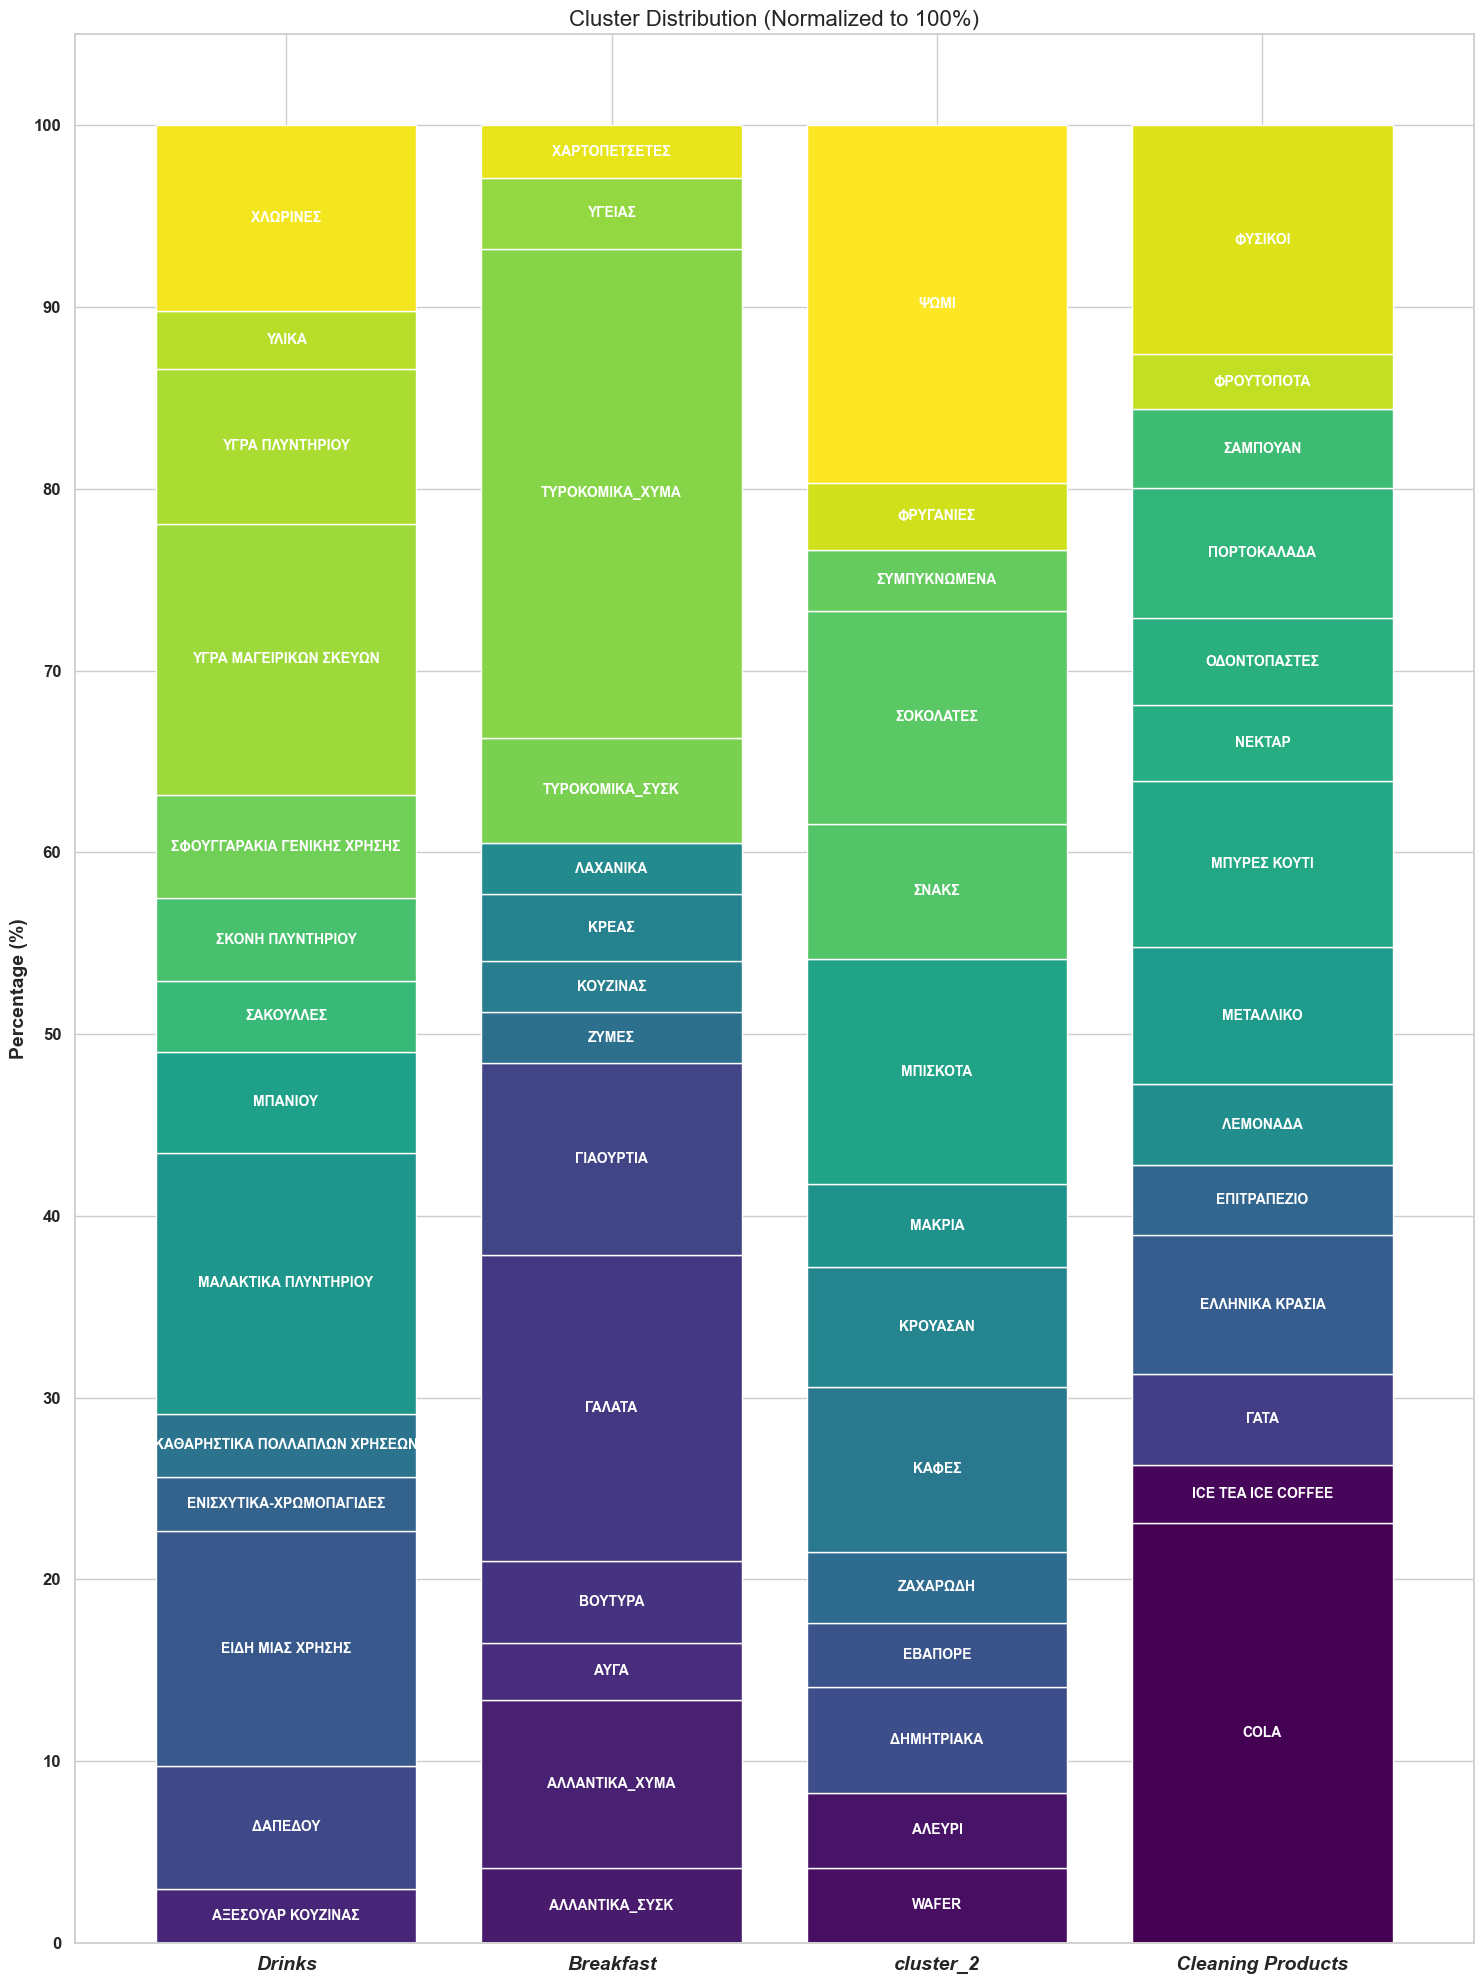

In [38]:
pivot_df = q1_df.pivot_table(
    index="product_name", 
    columns="cluster", 
    values="count(Joint code)", 
    aggfunc='sum',  # Ensure aggregation is done correctly
    fill_value=0
)


# Normalize the filtered data
filtered_pivot_df_normalized = (
    pivot_df.div(pivot_df.sum(axis=0), axis=1) * 100
)

# Define a mapping of old cluster names to new names
cluster_rename_map = {
    "cluster_0": "Drinks",
    "cluster_1": "Breakfast",
    "cluster_3": "Cleaning Products"
}

filtered_pivot_df_normalized.rename(columns=cluster_rename_map, inplace=True)

# Plot the normalized stacked bar chart for top 5 products
fig, ax = plt.subplots(figsize=(15, 20))

# Transpose the filtered normalized pivot table for plotting
bar_plot = filtered_pivot_df_normalized.T.plot(
    kind="bar", stacked=True, ax=ax, colormap="viridis", width=0.8, legend=False  # Remove legend
)

# Add product names inside the columns
for bar_group, (cluster, cluster_data) in enumerate(filtered_pivot_df_normalized.items()):
    bottom_offset = 0  # Tracks the current offset at the bottom of each stack
    for product_name, percentage in cluster_data.items():
        if percentage > 0:  # Only add labels for non-zero values
            # Find the center of the bar segment
            x_position = bar_group
            y_position = bottom_offset + (percentage / 2)
            
            # Add text label
            ax.text(
                x=x_position, 
                y=y_position, 
                s=product_name, 
                ha="center", 
                va="center", 
                fontsize=10, 
                color="white",
                weight="bold"
            )
            
            # Update the bottom offset for the next segment
            bottom_offset += percentage

# Customize the chart
plt.title("Cluster Distribution (Normalized to 100%)", fontsize=16)
plt.xlabel("", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=14, fontweight="bold")
plt.xticks(rotation=0, fontsize=14, fontweight="bold", fontstyle='italic')
plt.yticks(ticks=range(0, 101, 10), fontsize=12, fontweight="bold")

plt.tight_layout()
plt.show()


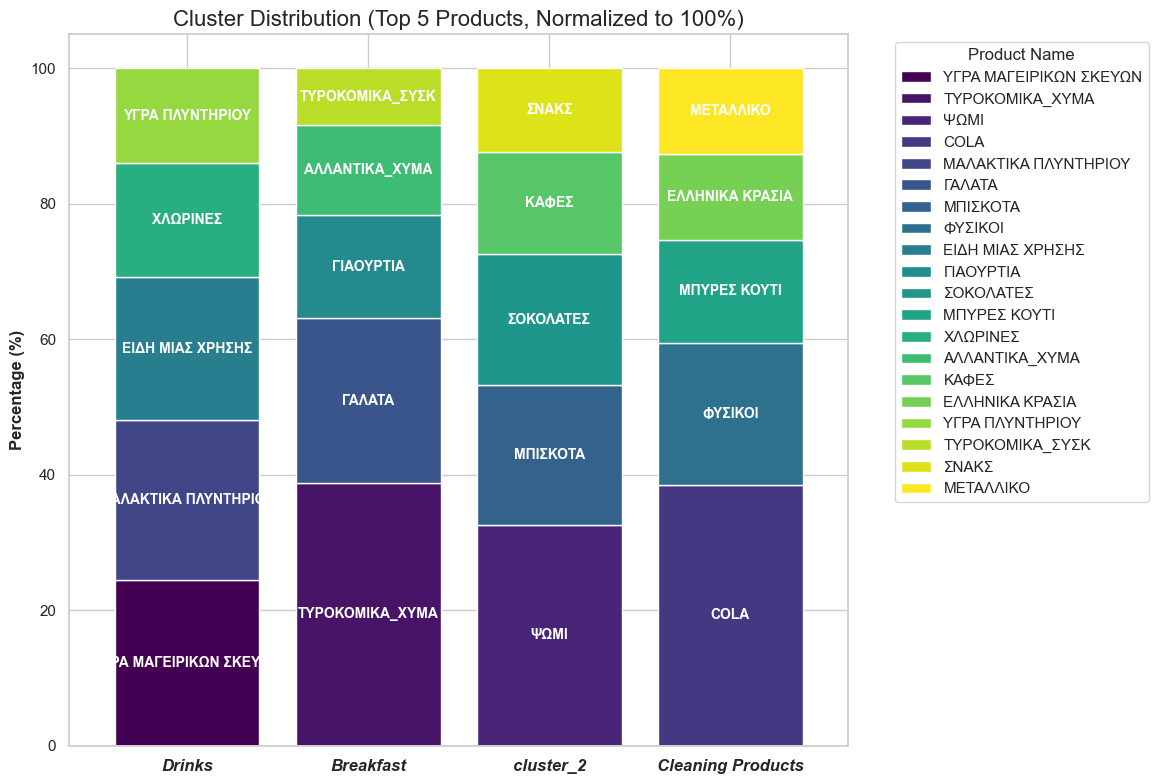

In [39]:
pivot_df = q1_df.pivot_table(
    index="product_name", 
    columns="cluster", 
    values="count(Joint code)", 
    aggfunc='sum',  # Ensure aggregation is done correctly
    fill_value=0
)

# Identify the top 5 products for each cluster
top_5_products_per_cluster = (
    pivot_df.apply(lambda col: col.nlargest(5).index, axis=0)
    .stack()
    .unique()
)

# Filter the pivot table to include only the top 5 products
filtered_pivot_df = pivot_df.loc[top_5_products_per_cluster]

# Normalize the filtered data
filtered_pivot_df_normalized = (
    filtered_pivot_df.div(filtered_pivot_df.sum(axis=0), axis=1) * 100
)

# Define a mapping of old cluster names to new names
cluster_rename_map = {
    "cluster_0": "Drinks",
    "cluster_1": "Breakfast",
    "cluster_3": "Cleaning Products"
}

# Rename the clusters in the pivot table
filtered_pivot_df.rename(columns=cluster_rename_map, inplace=True)
filtered_pivot_df_normalized.rename(columns=cluster_rename_map, inplace=True)

# Plot the normalized stacked bar chart for top 5 products
fig, ax = plt.subplots(figsize=(14, 8))

# Transpose the filtered normalized pivot table for plotting
bar_plot = filtered_pivot_df_normalized.T.plot(
    kind="bar", stacked=True, ax=ax, colormap="viridis", width=0.8
)

# Add product names inside the columns
for bar_group, (cluster, cluster_data) in enumerate(filtered_pivot_df_normalized.items()):
    bottom_offset = 0  # Tracks the current offset at the bottom of each stack
    for product_name, percentage in cluster_data.items():
        if percentage > 0:  # Only add labels for non-zero values
            # Find the center of the bar segment
            x_position = bar_group
            y_position = bottom_offset + (percentage / 2)
            
            # Add text label
            ax.text(
                x=x_position, 
                y=y_position, 
                s=product_name, 
                ha="center", 
                va="center", 
                fontsize=10, 
                color="white",
                weight="bold"
            )
            
            # Update the bottom offset for the next segment
            bottom_offset += percentage

# Customize the chart
plt.title("Cluster Distribution (Top 5 Products, Normalized to 100%)", fontsize=16)
plt.xlabel("", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12, fontweight="bold")
plt.xticks(rotation=0, fontsize=12, fontweight="bold", fontstyle='italic')
plt.legend(title="Product Name", bbox_to_anchor=(1.05, 1), loc="upper left")

# Adjust layout for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()
